In this notebook, a Polya's urn is implemented in a new way. After inizialization, for the first N1 steps the urn is used with the initial characteristic parameters (rho1 and nu1). Later, the charcteristic parameters change to rho2 and nu2. Then, starting from the last distribution, the urn is used with the new parameters, up to the final step. In this case, there is a further non stationary dynamics to take into account. Not only the Polya's urn generates non stationary sequences in its basic formulation (with consequent Heap's and Zipf's laws), now the urn changes its properties at a given temporal step without continuity.

In this example: Rho1 = 3, Nu1 = 2 (power law) for the first 60000 steps Rho2 = 1, Nu2 = 2 (linear increasing of novelties) for the last steps up to 300000

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import Polya

In [3]:
def ma(x, l=10):
    x = np.array(x)
    if l <= len(x):
        out = np.array([x[k:k+l].mean() for k in range(len(x)-l+1)])
    else:
        out = np.array([x.mean()])
    return out

### Defining parameter changes in Polya sequence

A list  containing the starting points of Polya sequence with associated parameters (rho and nu)

In [4]:
polya_params = [(0, (3,2)), (60000, (1,2))]

### Number of iterations

In [5]:
n_iters = 300000

### Function for several successive Polya sequences

In [6]:
def polya_sequences(polya_params):
    t_param = 0
    n_param = len(polya_params)
    for k in range(len(polya_params)):
        if k == 0:
            polya = Polya.PolyaUrn(rho=polya_params[k][1][0], nu=polya_params[k][1][1])
        else:
            polya.rho = polya_params[k][1][0]
            polya.nu_plus_1 = polya_params[k][1][1] + 1

        fr = polya_params[k][0]
        if k + 1 < len(polya_params):
            to = polya_params[k + 1][0]
        else:
            to = n_iters

        polya.get_sequence(seq_len=to-fr, init_polya=False, print_every=1000)
    return polya

### Getting the full non stationary sequence

In [7]:
polya = polya_sequences(polya_params)

0/60000
1000/60000
2000/60000
3000/60000
4000/60000
5000/60000
6000/60000
7000/60000
8000/60000
9000/60000
10000/60000
11000/60000
12000/60000
13000/60000
14000/60000
15000/60000
16000/60000
17000/60000
18000/60000
19000/60000
20000/60000
21000/60000
22000/60000
23000/60000
24000/60000
25000/60000
26000/60000
27000/60000
28000/60000
29000/60000
30000/60000
31000/60000
32000/60000
33000/60000
34000/60000
35000/60000
36000/60000
37000/60000
38000/60000
39000/60000
40000/60000
41000/60000
42000/60000
43000/60000
44000/60000
45000/60000
46000/60000
47000/60000
48000/60000
49000/60000
50000/60000
51000/60000
52000/60000
53000/60000
54000/60000
55000/60000
56000/60000
57000/60000
58000/60000
59000/60000
0/240000
1000/240000
2000/240000
3000/240000
4000/240000
5000/240000
6000/240000
7000/240000
8000/240000
9000/240000
10000/240000
11000/240000
12000/240000
13000/240000
14000/240000
15000/240000
16000/240000
17000/240000
18000/240000
19000/240000
20000/240000
21000/240000
22000/240000
23000/2

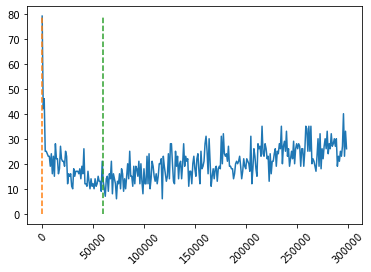

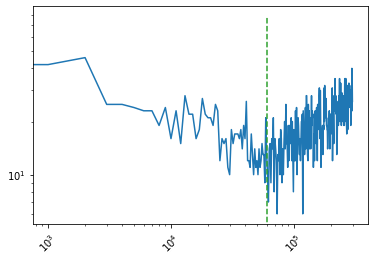

In [8]:
ss = []
dx = 1000
for k in range(0, n_iters, dx):
    ss.append(polya.seq_novelty[k:k+dx].sum())
plt.plot(range(0, n_iters, dx), ss)
y1 = max(ss)
for k in range(len(polya_params)):
    x1 = polya_params[k][0]
    plt.plot([x1,x1],[0,y1],'--')
_ = plt.xticks(rotation=45)
plt.show()

plt.loglog(range(0, n_iters, dx), ss)
for k in range(len(polya_params)):
    x1 = polya_params[k][0]
    plt.plot([x1,x1],[0,y1],'--')
_ = plt.xticks(rotation=45)
plt.show()

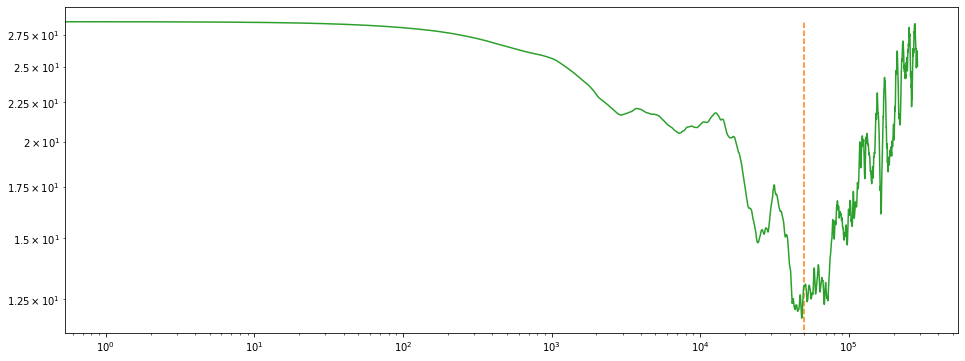

In [9]:
maval = 10000
plt.figure(figsize=(16,6))
ss = []
for k in range(n_iters):
    ss.append(polya.seq_novelty[k:k+dx].sum())
ss1 = ma(ss, maval)
y1 = max(ss1)
for k in range(len(polya_params)):
    x1 = polya_params[k][0] - int(maval/1)
    plt.plot([x1,x1],[0,y1],'--')
plt.loglog(ss1)

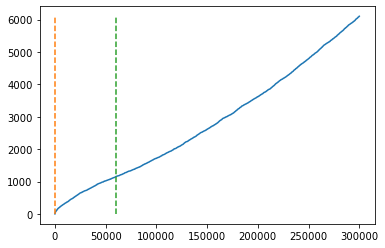

In [10]:
y = polya.seq_novelty.cumsum()
y1 = y.max()
plt.plot(y)
for k in range(len(polya_params)):
    x1 = polya_params[k][0]
    plt.plot([x1,x1],[0,y1],'--')

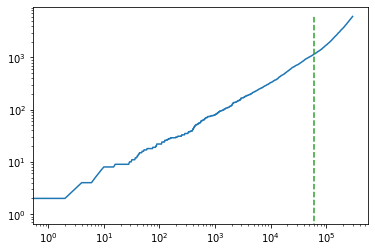

In [11]:
y = polya.seq_novelty.cumsum()
y1 = y.max()
plt.loglog(y)
for k in range(len(polya_params)):
    x1 = polya_params[k][0]
    plt.plot([x1,x1],[0,y1],'--')

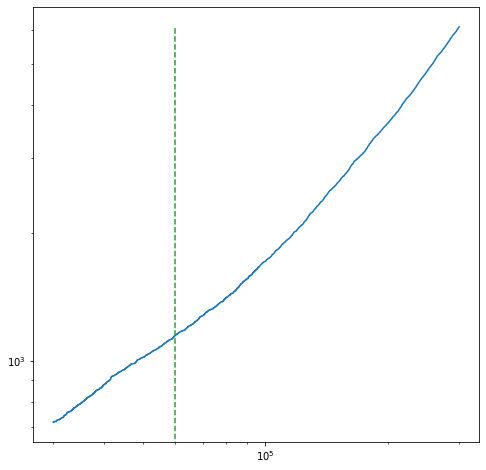

In [12]:
plt.figure(figsize=(8,8))
fr = 30000
y = polya.seq_novelty.cumsum()
y1 = y.max()
plt.loglog(range(fr, len(y)),y[fr:])
for k in range(len(polya_params)):
    x1 = polya_params[k][0]
    plt.plot([x1,x1],[0,y1],'--')

In [13]:
polya_params[1][0]

60000

In [14]:
import pickle

In [15]:
polya_final = dict()
polya_final['polya'] = polya
polya_final['polya_params'] = polya_params

In [16]:
with open('polya_seq/polya_urn_len_3000000_nu2_rho3_to60000_nu2_rho1.pkl', 'wb') as f:
    pickle.dump(polya_final, f)